In [1]:
from fipy import *
import numpy as np
import skimage.io as io
from skimage.util import invert

In [ ]:
2D example

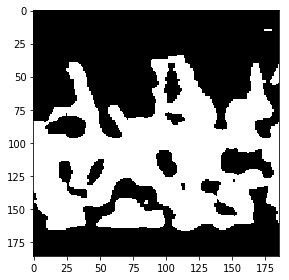

In [2]:
test_stack = io.imread('/Volumes/HD_1/LeafAir-WorkDir/Helwingia-test-stack.tif')
test_2D = test_stack[1]
io.imshow(test_2D)

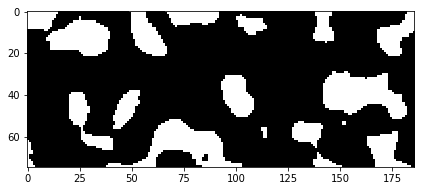

In [3]:
#subset first slice
test_2D = invert(test_2D[75:150,])
io.imshow(test_2D)

In [4]:
# Flatten the np.array
test_2D_flat = test_2D.flatten(order='F')
set(test_2D_flat) # get unique values

{0, 255}

In [5]:
# Define some dimensions
dx = 1.277 #µm
nx, ny = test_2D.shape
L = dx * nx
print(nx, ny, L)

(75, 186, 95.77499999999999)


In [6]:
# Mesh the np.array
mesh_2D = Grid2D(dx=dx, dy=dx, nx=nx, ny=ny)
mesh_2D

UniformGrid2D(dx=1.277, nx=75, dy=1.277, ny=186)

In [104]:
# Define some properties of the mesh
X, Y = mesh_2D.faceCenters

# Create a mesh named 'air', a mask named 'cells'
air = CellVariable(mesh_2D, name='air')
air_w_cells = CellVariable(mesh_2D, name='air_w_cells', value=test_2D_flat, hasOld=True)
#cells = FaceVariable(mesh=mesh_2D, value=test_2D_flat)

#Set the Drichlet boundary conditions
valueRight = 0
valueLeft = 0

air.constrain(valueLeft, mesh_2D.facesLeft)
air.constrain(valueRight, mesh_2D.facesRight)

print(air.faceConstraints)

[Constraint(value=0, where=(FaceVariable(value=array([[   0.6385,    1.9155,    3.1925, ...,   93.221 ,   94.498 ,
          95.775 ],
       [   0.    ,    0.    ,    0.    , ...,  236.8835,  236.8835,
         236.8835]]), mesh=UniformGrid2D(dx=1.277, nx=75, dy=1.277, ny=186))[index] == 0.0)), Constraint(value=0, where=(FaceVariable(value=array([[   0.6385,    1.9155,    3.1925, ...,   93.221 ,   94.498 ,
          95.775 ],
       [   0.    ,    0.    ,    0.    , ...,  236.8835,  236.8835,
         236.8835]]), mesh=UniformGrid2D(dx=1.277, nx=75, dy=1.277, ny=186))[index] == 95.775))]


In [66]:
air.old

air

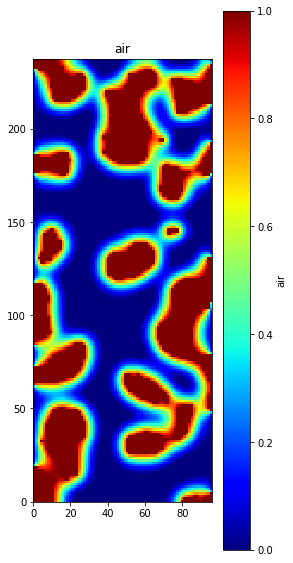

In [111]:
# Setup a viewer for the mesh
if __name__ == '__main__':
    viewer = Viewer(vars=air, datamin=0., datamax=1.)
    viewer.plot()

In [109]:
# Create the diffusion equation
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D) - ImplicitSourceTerm(air_w_cells * 1e6) + air_w_cells * 1e6 * D


In [110]:
# This will update the viewer above
timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 10
for step in range(steps):
    eq.solve(var=air,
             dt=timeStepDuration)
    if __name__ == '__main__':
        viewer.plot()


In [ ]:
ImplicitDiffusionTerm